## Importing Dataset

In [1]:
#Method 1(better more secured)

from google.colab import userdata
import os

# Store your credentials in Colab Secrets first (see below)
os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

!kaggle datasets download -d marcodena/mobile-phone-activity #marcodena/mobile-phone-activity
!unzip mobile-phone-activity.zip

Dataset URL: https://www.kaggle.com/datasets/marcodena/mobile-phone-activity
License(s): DbCL-1.0
 78% 188M/242M [00:00<00:00, 523MB/s] 
100% 242M/242M [00:00<00:00, 536MB/s]
Archive:  mobile-phone-activity.zip
  inflating: ISTAT_census_variables_2011.csv  
  inflating: Italian_provinces.geojson  
  inflating: mi-to-provinces-2013-11-01.csv  
  inflating: mi-to-provinces-2013-11-02.csv  
  inflating: mi-to-provinces-2013-11-03.csv  
  inflating: mi-to-provinces-2013-11-04.csv  
  inflating: mi-to-provinces-2013-11-05.csv  
  inflating: mi-to-provinces-2013-11-06.csv  
  inflating: mi-to-provinces-2013-11-07.csv  
  inflating: milano-grid.geojson     
  inflating: sms-call-internet-mi-2013-11-01.csv  
  inflating: sms-call-internet-mi-2013-11-02.csv  
  inflating: sms-call-internet-mi-2013-11-03.csv  
  inflating: sms-call-internet-mi-2013-11-04.csv  
  inflating: sms-call-internet-mi-2013-11-05.csv  
  inflating: sms-call-internet-mi-2013-11-06.csv  
  inflating: sms-call-internet-mi-2

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# TASK 1: Load and Merge data
Load 3 SMS/call/internet activity data (sms-call-internet-mi-2013-11-02.csv, sms-call-internet-mi-2013-11-04.csv, sms-call-internet-mi-2013-11-06.csv) and combine them.


### Loading all 3 activity files

In [3]:
files = [
    'sms-call-internet-mi-2013-11-02.csv',
    'sms-call-internet-mi-2013-11-04.csv',
    'sms-call-internet-mi-2013-11-06.csv'
]

In [4]:
print("Loading the data files...")
dataframes = []
for file in files:
    df = pd.read_csv(file)
    print(f"  {file}: {df.shape[0]:,} rows")
    dataframes.append(df)

Loading the data files...
  sms-call-internet-mi-2013-11-02.csv: 1,847,331 rows
  sms-call-internet-mi-2013-11-04.csv: 2,299,544 rows
  sms-call-internet-mi-2013-11-06.csv: 2,417,156 rows


In [5]:
combined_df = pd.concat(dataframes, ignore_index=True)
print(f"\nCombined dataset: {combined_df.shape[0]:,} rows × {combined_df.shape[1]} columns")


Combined dataset: 6,564,031 rows × 8 columns


In [6]:
combined_df.head(20)

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-02 00:00:00,1,0,0.2445,NaN,NaN,NaN,NaN
1,2013-11-02 00:00:00,1,39,1.4952,1.1213,0.2708,0.3004,46.5094
2,2013-11-02 00:00:00,1,53,0.0018,0.0036,NaN,NaN,NaN
3,2013-11-02 00:00:00,2,0,0.2458,NaN,NaN,NaN,NaN
4,2013-11-02 00:00:00,2,39,1.5028,1.1243,0.2751,0.3023,46.6933
5,2013-11-02 00:00:00,2,53,0.0009,0.0018,NaN,NaN,NaN
6,2013-11-02 00:00:00,3,0,0.2471,NaN,NaN,NaN,NaN
7,2013-11-02 00:00:00,3,39,1.5110,1.1274,0.2798,0.3044,46.8890
8,2013-11-02 00:00:00,4,0,0.2410,NaN,NaN,NaN,NaN
9,2013-11-02 00:00:00,4,39,1.4730,1.1126,0.2581,0.2948,45.9768


### Adding date and time columns

In [7]:
combined_df['datetime'] = pd.to_datetime(combined_df['datetime'])

print(combined_df[['datetime']].head(20))

     datetime
0  2013-11-02
1  2013-11-02
2  2013-11-02
3  2013-11-02
4  2013-11-02
5  2013-11-02
6  2013-11-02
7  2013-11-02
8  2013-11-02
9  2013-11-02
10 2013-11-02
11 2013-11-02
12 2013-11-02
13 2013-11-02
14 2013-11-02
15 2013-11-02
16 2013-11-02
17 2013-11-02
18 2013-11-02
19 2013-11-02


How many total records across all 3 datasets?
6,564,031

In [8]:
total_records = combined_df.shape[0]
print(f"Total records across all 3 datasets: {total_records:,}")

Total records across all 3 datasets: 6,564,031


How many unique grid squares (CellID) are there?
10,000

In [9]:
unique_cells = combined_df['CellID'].nunique()
print(f"Number of unique grid squares: {unique_cells:,}")

Number of unique grid squares: 10,000


How many unique country codes appear in the data?
302

In [10]:
unique_countries = combined_df['countrycode'].nunique()
print(f"Number of unique country codes: {unique_countries}\n")

Number of unique country codes: 302



Are there any missing values?
Yes, there are

In [11]:
missing_before = combined_df.isnull().sum()
print("Missing values: \n",missing_before[missing_before > 0])


Missing values: 
 smsin       3964171
smsout      5025738
callin      4761685
callout     3764484
internet    3621117
dtype: int64


In [12]:
# Total number of missing values
total_missing = missing_before.sum()
print(f"\nTotal missing values: {total_missing:,}")


Total missing values: 21,137,195


If yes, input missing/NaN with the mean of each columns.

In [13]:
# Activity columns
activity_cols = ['smsin', 'smsout', 'callin', 'callout', 'internet']

records_modified = 0

for col in activity_cols:
    missing_count = combined_df[col].isnull().sum()
    if missing_count > 0:
        col_mean = combined_df[col].mean()
        combined_df[col]= combined_df[col].fillna(col_mean)
        records_modified += missing_count
        print(f"{col}: Filled {missing_count} values with mean = {col_mean:.4f}")

print(f"\n Total values modified: {records_modified}")


smsin: Filled 3964171 values with mean = 7.8620
smsout: Filled 5025738 values with mean = 7.4408
callin: Filled 4761685 values with mean = 7.7386
callout: Filled 3764484 values with mean = 5.6867
internet: Filled 3621117 values with mean = 101.9762

 Total values modified: 21137195


For which columns are missing values most common? smsout, callin and smsin

What is the most common peak hour across all grids?
 17:00

In [14]:
combined_df['date'] = combined_df['datetime'].dt.date
combined_df['hour'] = combined_df['datetime'].dt.hour

print(combined_df[['date', 'hour']].head())

         date  hour
0  2013-11-02     0
1  2013-11-02     0
2  2013-11-02     0
3  2013-11-02     0
4  2013-11-02     0


In [15]:
combined_df['total_sms'] = combined_df['smsin'] + combined_df['smsout']
combined_df['total_calls'] = combined_df['callin'] + combined_df['callout']
combined_df['total_internet'] = combined_df['internet']
combined_df['total_activity'] = combined_df['total_sms'] + combined_df['total_calls'] + combined_df['total_internet']

print(combined_df[['total_sms', 'total_calls', 'total_internet', 'total_activity']].describe())

          total_sms   total_calls  total_internet  total_activity
count  6.564031e+06  6.564031e+06    6.564031e+06    6.564031e+06
mean   1.530273e+01  1.342530e+01    1.019762e+02    1.307042e+02
std    2.822765e+01  3.252595e+01    2.852160e+02    3.380664e+02
min    0.000000e+00  0.000000e+00    0.000000e+00    6.000000e-04
25%    7.884876e+00  7.752804e+00    2.819000e-01    2.888203e+01
50%    1.530273e+01  1.342530e+01    1.019762e+02    1.199549e+02
75%    1.530273e+01  1.342530e+01    1.019762e+02    1.250359e+02
max    4.503561e+03  2.724374e+03    3.174863e+04    3.564692e+04


In [16]:
hourly_by_grid = combined_df.groupby(['CellID', 'hour'])['total_activity'].sum().reset_index()
peak_hours = hourly_by_grid.loc[hourly_by_grid.groupby('CellID')['total_activity'].idxmax()]

# Most common peak hour
most_common_peak = peak_hours['hour'].mode()[0]
count = (peak_hours['hour'] == most_common_peak).sum()

print(f"Most common peak hour: {most_common_peak}:00")

Most common peak hour: 17:00


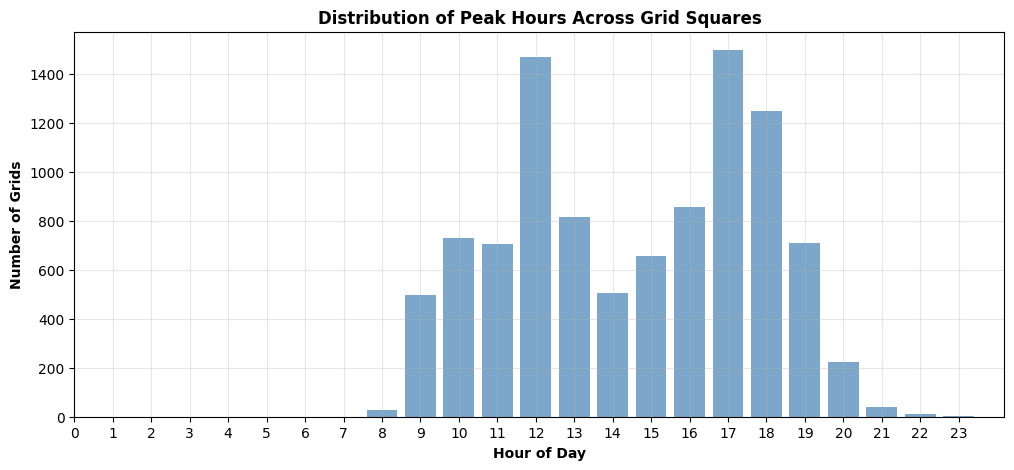

In [17]:
plt.figure(figsize=(12, 5))
peak_dist = peak_hours['hour'].value_counts().sort_index()
plt.bar(peak_dist.index, peak_dist.values, color='steelblue', alpha=0.7)
plt.xlabel('Hour of Day', fontweight='bold')
plt.ylabel('Number of Grids', fontweight='bold')
plt.title('Distribution of Peak Hours Across Grid Squares', fontweight='bold')
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.show()

What hour has the lowest activity? 4:00

In [18]:
activity_by_hour = combined_df.groupby('hour')['total_activity'].sum()
lowest_hour = activity_by_hour.idxmin()

print(f"Hour with lowest activity: {lowest_hour}:00")


Hour with lowest activity: 4:00


/tmp/ipython-input-2867571839.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


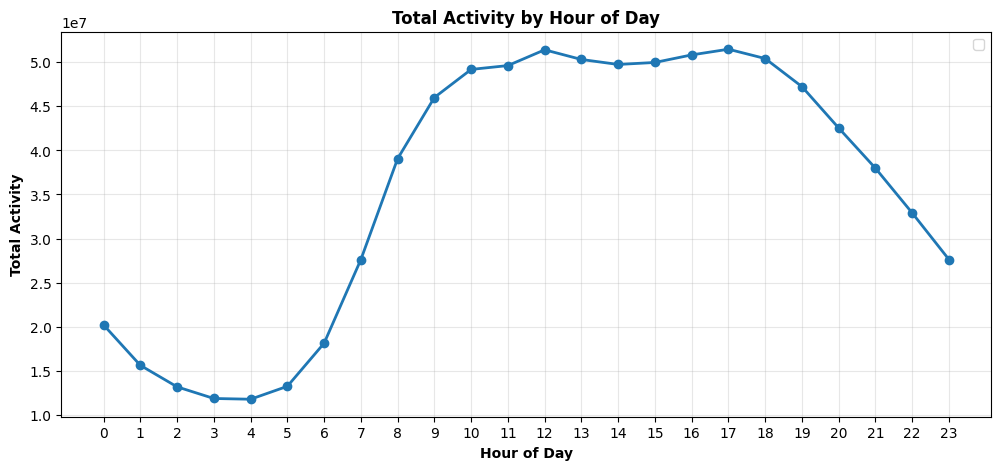

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(activity_by_hour.index, activity_by_hour.values, marker='o', linewidth=2, markersize=6)
plt.xlabel('Hour of Day', fontweight='bold')
plt.ylabel('Total Activity', fontweight='bold')
plt.title('Total Activity by Hour of Day', fontweight='bold')
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Calculate and report: mean, median, std, min, max for total calls by hour

Mean  : 3,671,836.31

Median: 4,145,010.33

Std   : 1,837,423.89

Min   : 971,110.83

Max   : 5,801,570.12

In [20]:
calls_by_hour = combined_df.groupby('hour')['total_calls'].sum()

stats = {
    'mean': np.mean(calls_by_hour),
    'median': np.median(calls_by_hour),
    'std': np.std(calls_by_hour),
    'min': np.min(calls_by_hour),
    'max': np.max(calls_by_hour)
}

for stat, value in stats.items():
    print(f"  {stat.capitalize():6s}: {value:,.2f}")

  Mean  : 3,671,836.31
  Median: 4,145,010.33
  Std   : 1,837,423.89
  Min   : 971,110.83
  Max   : 5,801,570.12


What percentage of total activity happens during daytime (6am-8pm) vs nighttime(8 pm -6 am)?

Daytime - 73.55%

Nighttime - 26.45%



In [21]:
combined_df['time_period'] = combined_df['hour'].apply(
    lambda x: 'Daytime' if 6 <= x < 20 else 'Nighttime'
)

period_activity = combined_df.groupby('time_period')['total_activity'].sum()
total = period_activity.sum()

daytimep = (period_activity['Daytime'] / total) * 100
nighttimep = (period_activity['Nighttime'] / total) * 100

print(f"Daytime: {daytimep:.2f}%")
print(f"Nighttime: {nighttimep:.2f}%")

Daytime: 73.55%
Nighttime: 26.45%


Do international calls happen at different times than domestic? (compare hourly patterns)

Yes

Because domestic calles peak at 17:00 while international calls peak at 12:00

In [22]:
combined_df['call_type'] = combined_df['countrycode'].apply(
    lambda x: 'Domestic (Italy)' if x == 39 else 'International'
)

domestic_hourly = combined_df[combined_df['call_type']=='Domestic (Italy)'].groupby('hour')['total_calls'].sum()
intl_hourly = combined_df[combined_df['call_type']=='International'].groupby('hour')['total_calls'].sum()

domestic_peak = domestic_hourly.idxmax()
intl_peak = intl_hourly.idxmax()

print(f"Domestic calls peak: {domestic_peak}:00")
print(f"International calls peak: {intl_peak}:00")


Domestic calls peak: 17:00
International calls peak: 12:00


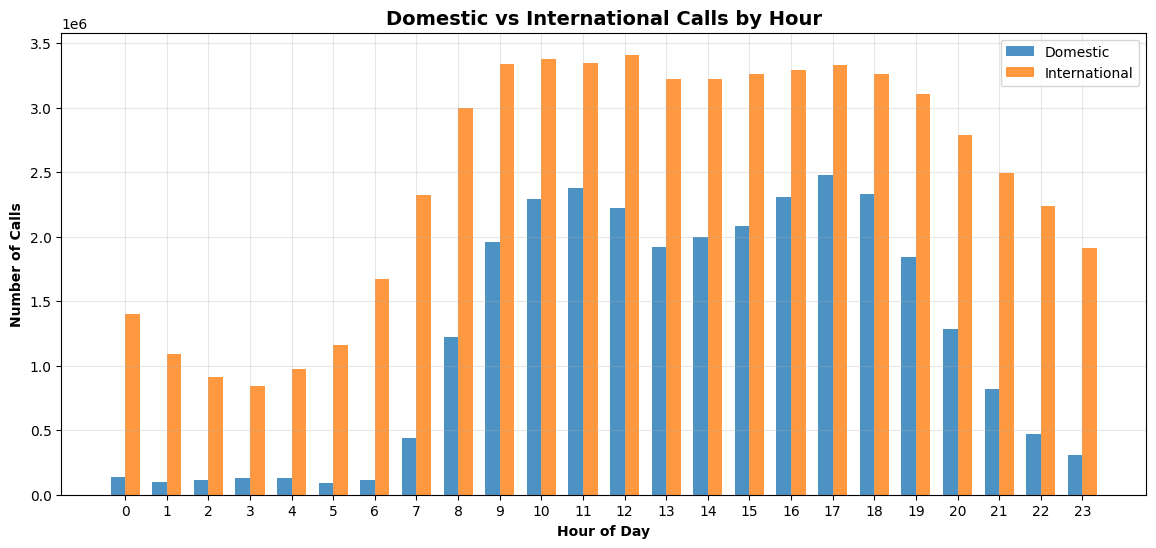

In [23]:
fig, ax = plt.subplots(figsize=(14, 6))
x = np.arange(24)
width = 0.35
ax.bar(x - width/2, domestic_hourly.values, width, label='Domestic', alpha=0.8)
ax.bar(x + width/2, intl_hourly.values, width, label='International', alpha=0.8)
ax.set_xlabel('Hour of Day', fontweight='bold')
ax.set_ylabel('Number of Calls', fontweight='bold')
ax.set_title('Domestic vs International Calls by Hour', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.legend()
ax.grid(True, alpha=0.3)
plt.show()

## Use numpy to perform statistical comparisons between different conditions

Compare:

Domestic (Italy) vs International calls.

What percentage of calls are international vs domestic? **Domestic calls: 33.11%
International calls: 66.89%**

What percentage of SMS are international vs domestic? **Domestic SMS: 24.98%
International SMS: 75.02%**

Are international calls more incoming or outgoing (calculate the ratio)? **More Incoming, Ratio is Incoming : Outgoing = 1.6749 : 1**

In [24]:
domestic_data = combined_df[combined_df['call_type']=='Domestic (Italy)']
#print(domestic_data.head(5))
intl_data = combined_df[combined_df['call_type']=='International']
#print(intl_data.head(5))
dom_calls = domestic_data['total_calls'].values
#print(dom_calls)
intl_calls = intl_data['total_calls'].values
#print(intl_calls)

In [25]:
# Mean, std, max, min, of domestic calls vs intl
print("Domestic Calls:")
print(f"  Mean: {np.mean(dom_calls):.4f}")
print(f"  Std: {np.std(dom_calls):.4f}")
print(f"  Median: {np.median(dom_calls):.4f}")
print(f"  Min: {np.min(dom_calls):.4f}")
print(f"  Max: {np.max(dom_calls):.4f}")

print("\nInternational Calls:")
print(f"  Mean: {np.mean(intl_calls):.4f}")
print(f"  Std: {np.std(intl_calls):.4f}")
print(f"  Median: {np.median(intl_calls):.4f}")
print(f"  Min: {np.min(intl_calls):.4f}")
print(f"  Max: {np.max(intl_calls):.4f}")

Domestic Calls:
  Mean: 40.5200
  Std: 93.2892
  Median: 10.9838
  Min: 0.0000
  Max: 2724.3738

International Calls:
  Mean: 10.0872
  Std: 3.8051
  Median: 13.4253
  Min: 0.0000
  Max: 105.0105


In [26]:
total_calls = combined_df['total_calls'].sum()
dom_calls_sum = domestic_data['total_calls'].sum()
intl_calls_sum = intl_data['total_calls'].sum()

dom_p = (dom_calls_sum / total_calls) * 100
intl_p = (intl_calls_sum / total_calls) * 100

print(f"Domestic calls: {dom_p:.2f}%")
print(f"International calls: {intl_p:.2f}%")

Domestic calls: 33.11%
International calls: 66.89%


In [27]:
total_sms = combined_df['total_sms'].sum()
dom_sms_sum = domestic_data['total_sms'].sum()
intl_sms_sum = intl_data['total_sms'].sum()

dom_sms_p = (dom_sms_sum / total_sms) * 100
intl_sms_p = (intl_sms_sum / total_sms) * 100

print(f"Domestic SMS: {dom_sms_p:.2f}%")
print(f"International SMS: {intl_sms_p:.2f}%")


Domestic SMS: 24.98%
International SMS: 75.02%


In [28]:
intl_callin = intl_data['callin'].sum()
intl_callout = intl_data['callout'].sum()

if intl_callout > 0:
    print(f"\n  Incoming: {intl_callin:,.0f}")
    print(f"  Outgoing: {intl_callout:,.0f}")
    ratio = intl_callin / intl_callout
    print(f"International calls ratio (Incoming/Outgoing): {ratio:.4f}")



  Incoming: 36,911,801
  Outgoing: 22,038,041
International calls ratio (Incoming/Outgoing): 1.6749


2. Different activity types.
Is there a correlation between SMS volume and Call volume at the grid level? Yes, a positive correlation

In [29]:
grid_agg = combined_df.groupby('CellID')[['total_sms', 'total_calls']].sum()

correlation = np.corrcoef(grid_agg['total_sms'], grid_agg['total_calls'])[0, 1]

print(f"Correlation coefficient: {correlation:.4f}")

if correlation > 0.7:
    corr_type = "A strong positive correlation"
elif correlation > 0.3:
    corr_type = "A moderate positive correlation"
elif correlation > 0:
    corr_type = "A weak positive correlation"
else:
    corr_type = "A negative correlation"

print(corr_type)


Correlation coefficient: 0.9862
A strong positive correlation


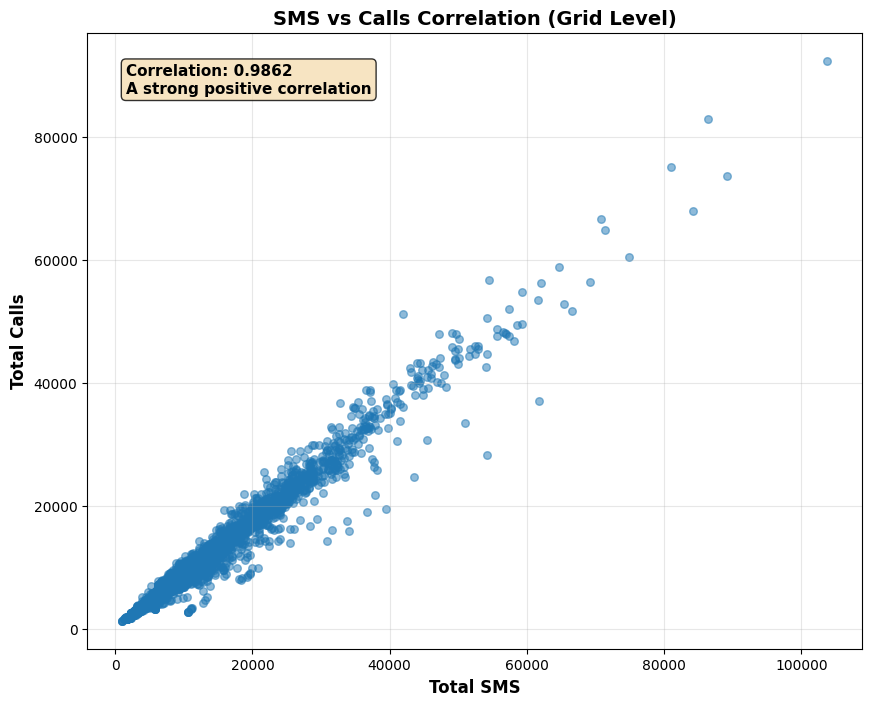

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(grid_agg['total_sms'], grid_agg['total_calls'], alpha=0.5, s=30)
plt.xlabel('Total SMS', fontweight='bold', fontsize=12)
plt.ylabel('Total Calls', fontweight='bold', fontsize=12)
plt.title('SMS vs Calls Correlation (Grid Level)', fontweight='bold', fontsize=14)
plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}\n{corr_type}',
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
         fontsize=11, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

In [31]:
output_file = 'cdr_clean.csv'
combined_df.to_csv(output_file, index=False)
print(f"Cleaned dataset saved to {output_file}")

Cleaned dataset saved to cdr_clean.csv
